In [1]:
# Setting up the Colab environment. DO NOT EDIT!
try:
  from applied_biostats import setup_environment
except ImportError:
    ! pip install -q otter-grader==4.0.0, pingouin
    import otter

if not os.path.exists('lab-tests'):
    zip_files = [f for f in os.listdir() if f.endswith('.zip')]
    assert len(zip_files)>0, 'Could not find any zip files!'
    assert len(zip_files)==1, 'Found multiple zip files!'
    ! unzip {zip_files[0]}

grader = otter.Notebook(colab=True,
                        tests_dir = 'lab-tests')

# Lab

## Learning Objectives
At the end of this learning activity you will be able to:
 - Practice using robust correlation tools that account for outliers.
 - Practice using `pg.qqplot` and `pg.normality` to asses the normality of residuals.
 - Practice using regression to create covariate-controlled scores.


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import pingouin as pg

%matplotlib inline

In [3]:
data = pd.read_csv('hiv_neuro_data.csv')
data['education'] = data['education'].astype(float)
data.head()

,sex,age,education,race,processing_domain_z,exec_domain_z,language_domain_z,visuospatial_domain_z,learningmemory_domain_z,motor_domain_z,ART,YearsSeropositive
0,male,62,10.0,AA,0.5,0.6,0.151646,-1.0,-1.152131,-1.364306,Stavudine,13
1,male,56,10.0,AA,-0.5,1.2,-0.255505,-2.0,-0.086376,-0.348600,Truvada,19
2,female,51,10.0,AA,0.5,0.1,0.902004,-0.4,-1.139892,0.112215,Stavudine,9
3,female,47,12.0,AA,-0.6,-1.2,-0.119866,-2.1,0.803619,-2.276768,Truvada,24
4,male,46,13.0,AA,-0.4,1.3,0.079129,-1.3,-0.533607,-0.330541,Truvada,14


This lab is going to explore the inter-relationships between two cognitive domains.

* **Executive Function**: The complex cognitive processes required for planning, organizing, problem-solving, abstract thinking, and executing strategies. This domain also encompasses decision-making and cognitive flexibility, which is the ability to switch between thinking about two different concepts or to think about multiple concepts simultaneously.
- **Speed of Information Processing**: How quickly an individual can understand and react to the information being presented. This domain evaluates the speed at which cognitive tasks can be performed, often under time constraints.

### Q1: Are Processing domain and Executive domain scores correlated?

Checked variables:
 * `q1_plot` - A regression plot between `processing_domain_z` and `exec_domain_z`.
 * `q1_corr_res` - The result of running `pg.corr` on `processing_domain_z` and `exec_domain_z`.
 * `q1_is_corr` - A yes/no assessment of the correlation between `processing_domain_z` and `exec_domain_z`.

<details><summary>Hint</summary>
Use the sns.regplot described throughout the Module 9 walkthrough.</details>

|               |    |
| --------------|----|
| Points        | 5  |
| Public Checks | 3  |
| Hidden Tests  | 1  |

_Points:_ 5

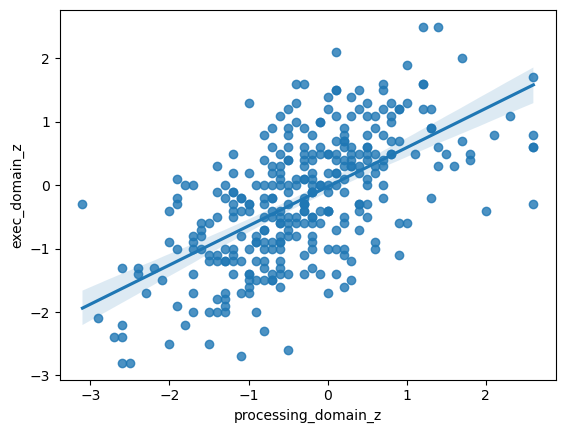

In [4]:
# Generate a plot between processing_domain_z and exec_domain_z

q1_plot = sns.regplot(data = data, x = 'processing_domain_z', y = 'exec_domain_z') # SOLUTION

In [5]:
# Use pg.corr to calculate the correlation between the two variables using a `robust` correlation metric

q1_corr_res = pg.corr(data['processing_domain_z'],  data['exec_domain_z'], method='bicor') # SOLUTION

In [6]:
# Are the two domains significantly correlated? 'yes' or 'no'

q1_is_corr = 'yes' # SOLUTION

In [ ]:
grader.check("q1_domain_corr")

### Q2: Create a regression for the processing domain that accounts for the following demographic covariates.

 - Age
 - Race
 - Sex
 - Education
 - Years Seropositive
 - ART

Checked variables:
 * `q2_model_resid_normal` - A yes/no assessment of the normality of the residuals after building the model. It should be supported by qqplots and normality tests.
 * `q2_processing_age` - A yes/no assessment on whether age has a significant impact on `processing_domain_z`.
 * `q2_processing_race` - A yes/no assessment on whether race has a significant impact on `processing_domain_z`.
 * `q2_processing_sex` - A yes/no assessment on whether sex has a significant impact on `processing_domain_z`.
 * `q2_processing_edu` - A yes/no assessment on whether education has a significant impact on `processing_domain_z`.
 * `q2_processing_ys` - A yes/no assessment on whether infection length has a significant impact on `processing_domain_z`.
 * `q2_processing_art` - A yes/no assessment on whether ART has a significant impact on `processing_domain_z`.

<details><summary>Hint</summary>
Recreate the final merged X and y (using processing_domain_z this time) that we created in the Module 9 Walkthrough under the Regression with categories section. Then perform the same regression and interpretion of the results.</details>

|               |    |
| --------------|----|
| Points        | 10 |
| Public Checks | 7  |
| Hidden Tests  | 7  |

_Points:_ 10

In [11]:
# Perform the regression using `pg.linear_regression`
# Use the result to answer the questions below

# BEGIN SOLUTION NO PROMPT

X = pd.concat([data[['YearsSeropositive', 'education', 'age']],
               pd.get_dummies(data['race'], drop_first=True).astype(float),
               pd.get_dummies(data['sex'], drop_first=True).astype(float),
               pd.get_dummies(data['ART'], drop_first=True).astype(float),
              ], axis=1)
y = data['processing_domain_z']
proc_res = pg.linear_regression(X, y)
proc_res
# END SOLUTION


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.262172,0.422352,-0.620742,5.352152e-01,0.457157,0.44517,-1.093140,0.568796
1,YearsSeropositive,-0.050270,0.003251,-15.460957,1.415918e-40,0.457157,0.44517,-0.056668,-0.043873
2,education,-0.008359,0.019456,-0.429610,6.677710e-01,0.457157,0.44517,-0.046638,0.029921
3,age,0.028414,0.005866,4.843836,1.995275e-06,0.457157,0.44517,0.016873,0.039956
4,C,-0.713775,0.115792,-6.164264,2.151086e-09,0.457157,0.44517,-0.941594,-0.485956
5,H,0.311427,0.147741,2.107924,3.582227e-02,0.457157,0.44517,0.020750,0.602104
6,male,-0.205072,0.092411,-2.219129,2.718563e-02,0.457157,0.44517,-0.386888,-0.023256
7,Truvada,0.154097,0.099221,1.553070,1.214043e-01,0.457157,0.44517,-0.041118,0.349311


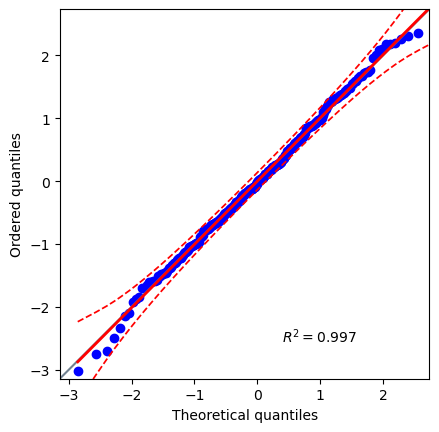

In [12]:
# Assess the normality of the residuals of the model

# BEGIN SOLUTION NO PROMPT

pg.qqplot(proc_res.residuals_)
pg.normality(proc_res.residuals_, method='normaltest')

# END SOLUTION

q2_model_resid_normal = 'yes' # SOLUTION

In [13]:
# Considering a p<0.01 threshold answer which of the following are significant

# Age
q2_processing_age = 'yes' # SOLUTION

# Race
q2_processing_race = 'yes' # SOLUTION

# Sex
q2_processing_sex = 'no' # SOLUTION

# Education
q2_processing_edu = 'no' # SOLUTION

# Infection length
q2_processing_ys = 'no' # SOLUTION

# ART
q2_processing_art = 'no' # SOLUTION

In [ ]:
grader.check("q2_exec_adj")

<!-- BEGIN QUESTION -->

### Q3: Comparison

In the Walkthrough we explored the variables that had an impact on Executive Domain function.
This complex cognitive processes required for planning, organizing, problem-solving, abstract thinking, and executing strategies.
This domain also encompasses decision-making and cognitive flexibility, which is the ability to switch between thinking about two different concepts or to think about multiple concepts simultaneously.

In this lab you performed a similar analysis to find the variables that impact Processing Domain function.
This metric measures how quickly an individual can understand and react to the information being presented.
This domain evaluates the speed at which cognitive tasks can be performed, often under time constraints.

In a paragraph compare and contrast the statistically significant variables between the two metrics.

_Points:_ 10

Write your solution here in this box.

**SOLUTION**

| Measure | Executive | Processing | Logical reason
|---------|-----------|------------|--------------
| Age      | Yes       | Yes        | Age makes cognitive task slower and more difficult to maintain.
| Education| Yes       | No        | Education likely leads to more executive function but would have no effect on processing speed.
| Race     | Yes       | Yes        | Racial biases likely impact performance on tests.
| YS     | Yes       | No        | Reflects HIV biology discussed by Kate in the video.
| ART     | Yes       | No        | May be probative of how ART impacts the brain.







<!-- END QUESTION -->

--------------------------------------------

In [28]:
grader.check_all()

## Submission

Check:
 - That all tables and graphs are rendered properly.
 - Code completes without errors by using `Restart & Run All`.
 - All checks **pass**.
 
Then save the notebook and the `File` -> `Download` -> `Download .ipynb`. Upload this file to BBLearn.